In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

# numeric and matrix operations
import math
import numpy as np
import pandas as pd

# scientific computations library
import scipy as sp

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

# import the function to compute cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer


import warnings
warnings.filterwarnings('ignore')

In [12]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = ["crimson","hotpink","deeppink","lightpink","orchid","magenta","violet","fuchsia","mediumvioletred","purple","darkmagenta","pink","plum","indigo"]

In [13]:
fulldata = pd.merge(anime,rating,on="anime_id",suffixes= [None, "_user"])
fulldata = fulldata.rename(columns={"rating_user": "user_rating"})

print(f"Shape of The Merged Dataset : {fulldata.shape}")
print(f"\nGlimpse of The Merged Dataset :")

fulldata.head().style.set_properties(**{"background-color": "pink","color":"purple","border": "1.5px  solid black"})

Shape of The Merged Dataset : (7813727, 9)

Glimpse of The Merged Dataset :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,278,-1


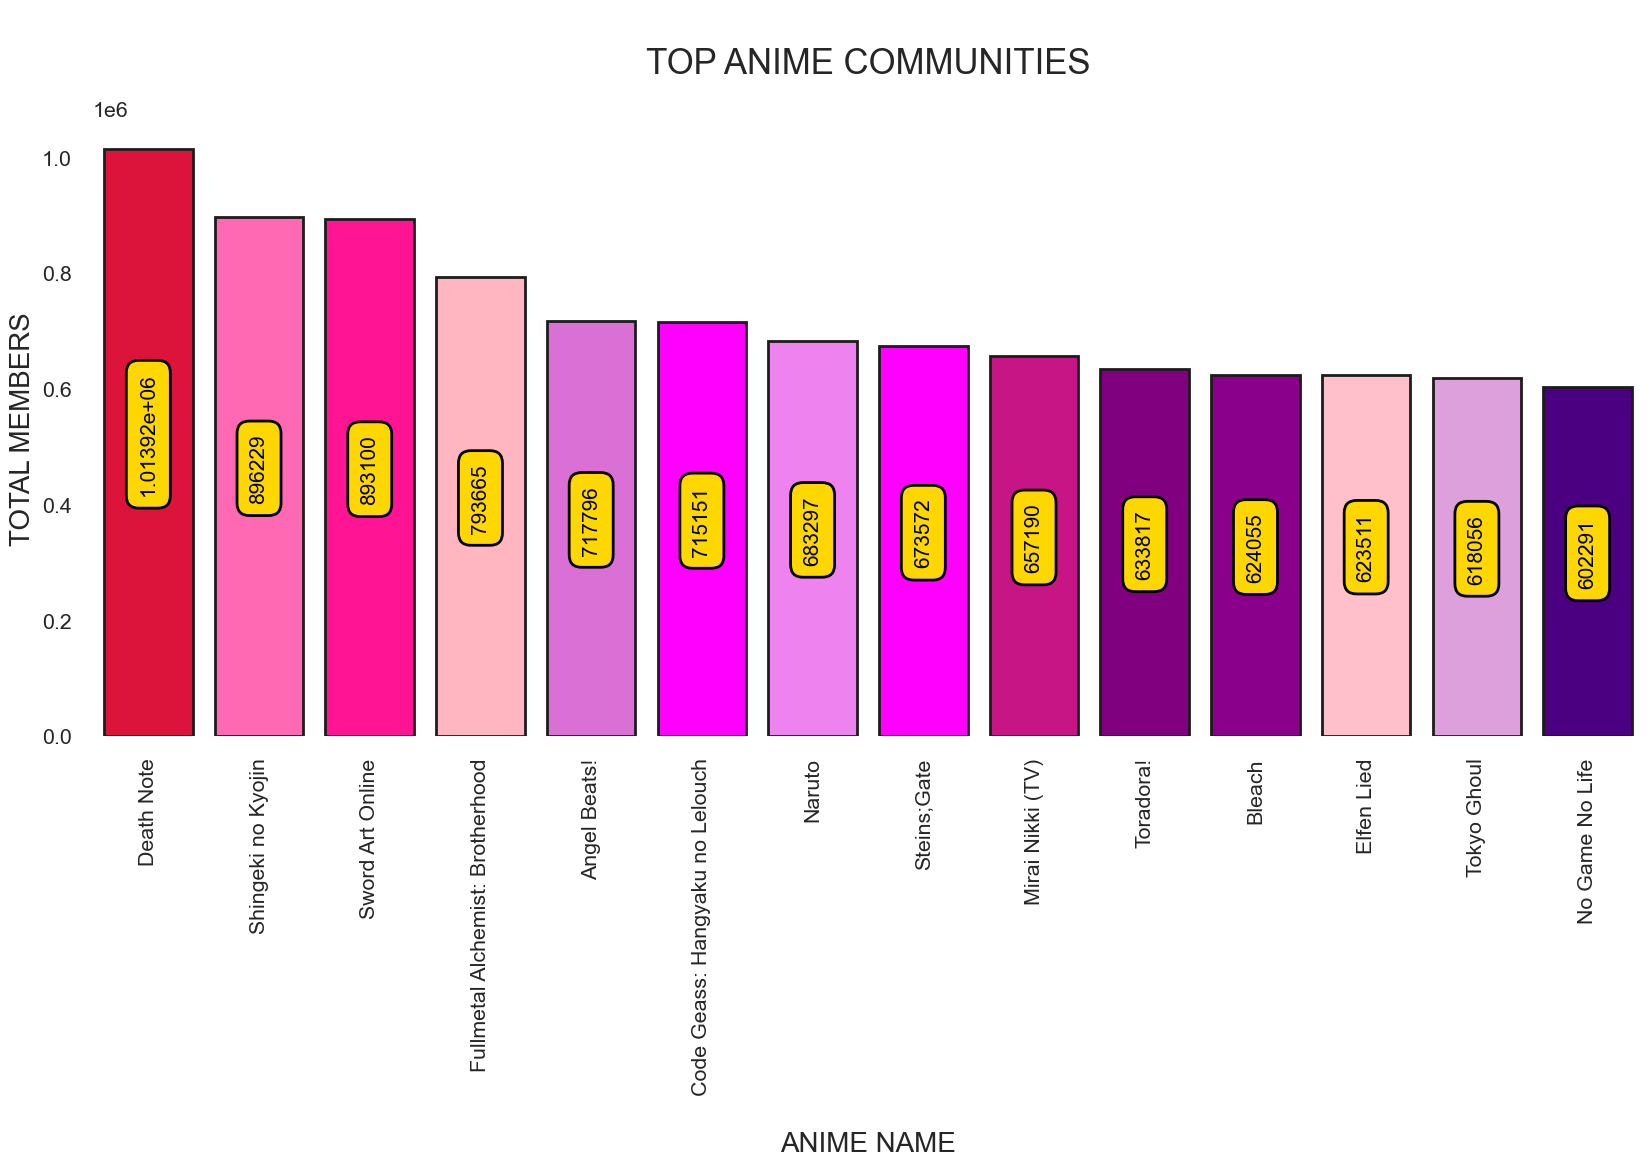

In [14]:
top_anime = fulldata.copy()
top_anime.drop_duplicates(subset ="name", keep = "first", inplace = True)
top_anime_temp1 = top_anime.sort_values(["members"],ascending=False)

plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_anime_temp1["name"][:14],y=top_anime_temp1["members"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTOP ANIME COMMUNITIES\n", fontsize=25)
plt.ylabel("TOTAL MEMBERS" , fontsize = 20)
plt.xlabel("\nANIME NAME" , fontsize = 20)
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black",rotation = 90,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "gold", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

In [15]:
anime = pd.read_csv("anime.csv")
rating = pd.read_csv("rating.csv")

In [16]:
print("Anime Categories :")
top_anime_temp1["type"].value_counts().to_frame().T.style.set_properties(**{"background-color": "purple","color":"white","pink": "1.5px  solid black"})

Anime Categories :


,TV,OVA,Movie,Special,ONA,Music
type,3402,3090,2141,1582,529,451


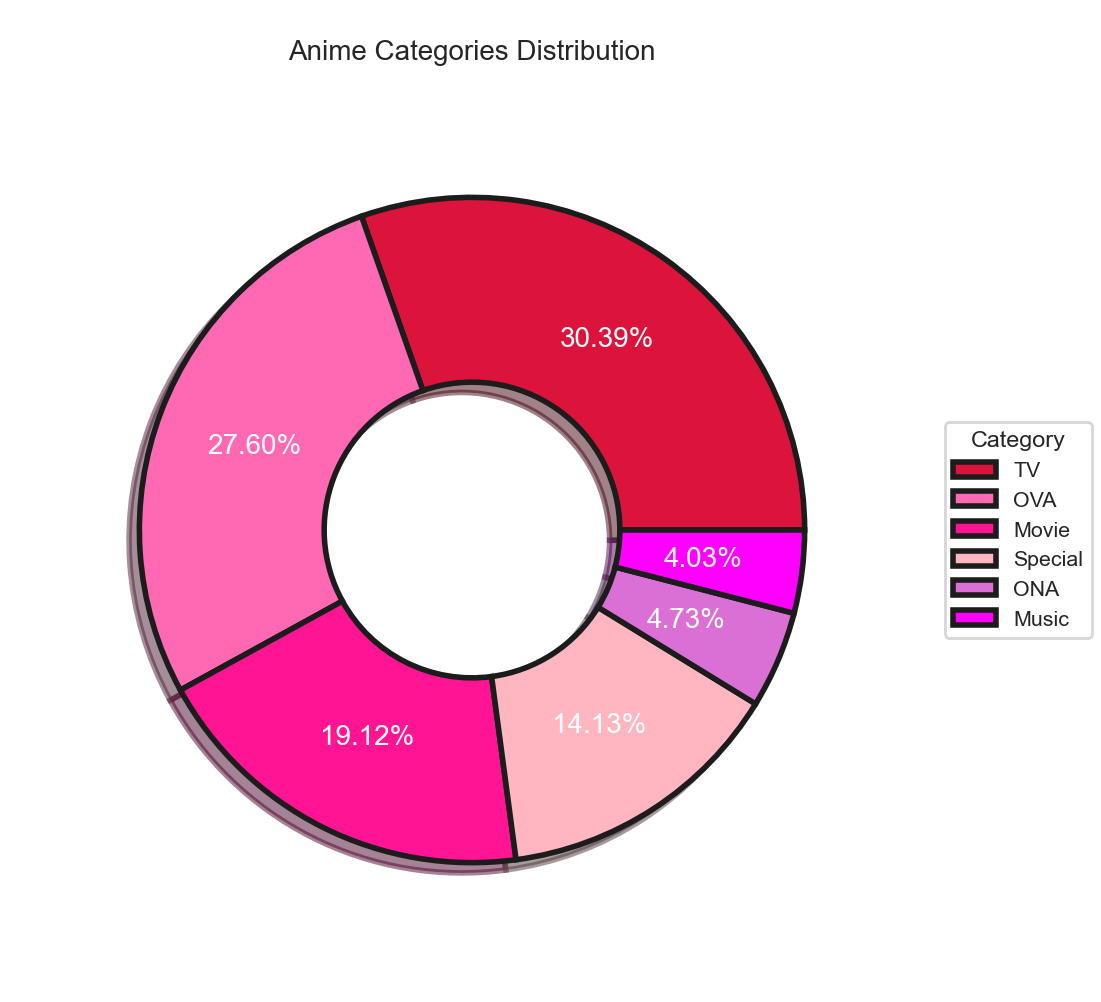

In [17]:
plt.subplots(figsize=(12, 12))

labels = "TV","OVA","Movie","Special","ONA","Music"
size = 0.5

wedges, texts, autotexts = plt.pie([len(top_anime_temp1[top_anime_temp1["type"]=="TV"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="OVA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Movie"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Special"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="ONA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Music"]["type"])],
                                    explode = (0,0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.7,
                                    radius=.9, 
                                    colors = palette, 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "#1c1c1c", 
                                    linewidth = 4),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nAnime Categories Distribution",fontsize=20)
plt.show()

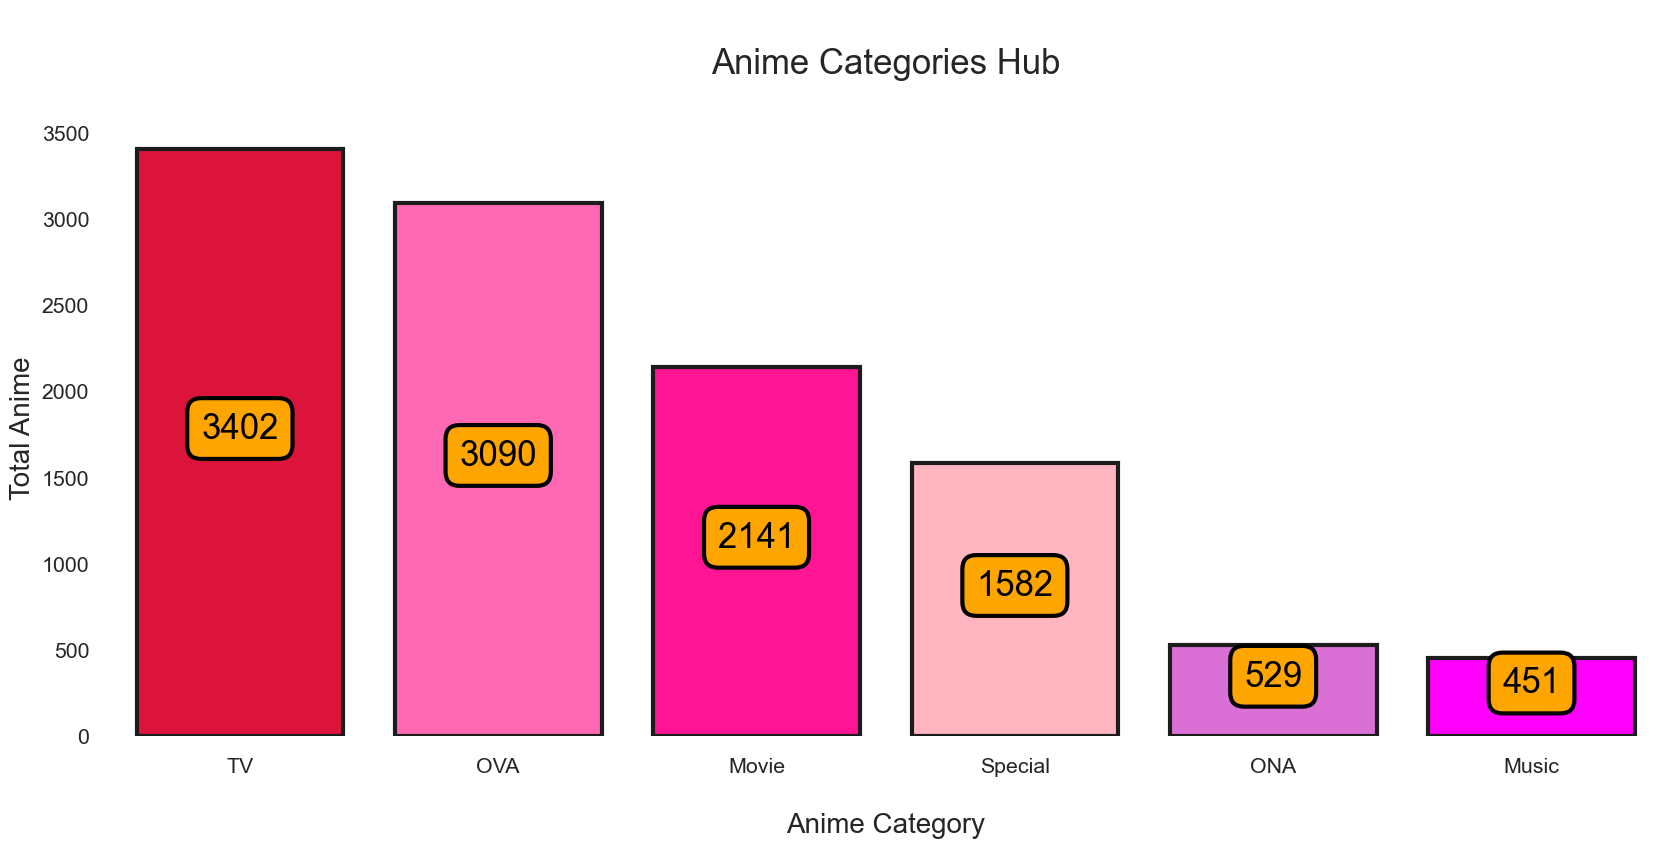

In [19]:
plt.subplots(figsize = (20,8))
p = sns.countplot(x = top_anime_temp1["type"], order = top_anime_temp1["type"].value_counts().index, palette = palette, saturation = 1, edgecolor = "#1c1c1c", linewidth = 3)
p.axes.set_title("\nAnime Categories Hub\n" ,fontsize = 25)
plt.ylabel("Total Anime" ,fontsize = 20)
plt.xlabel("\nAnime Category" ,fontsize = 20)
plt.xticks(rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 25,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "black", "linewidth" : 3, "alpha": 1})

sns.despine(left = True, bottom = True)
plt.show()

* 3402 animes are on TV which is 30.48% of total animes
* 2111 animes are streamed as a Movie which is 18.91% of total animes
* 3090 animes are streamed as a OVA which is 27.69% of total animes also greater than ONA which includes 526 animes that is 4.71% of total animes.

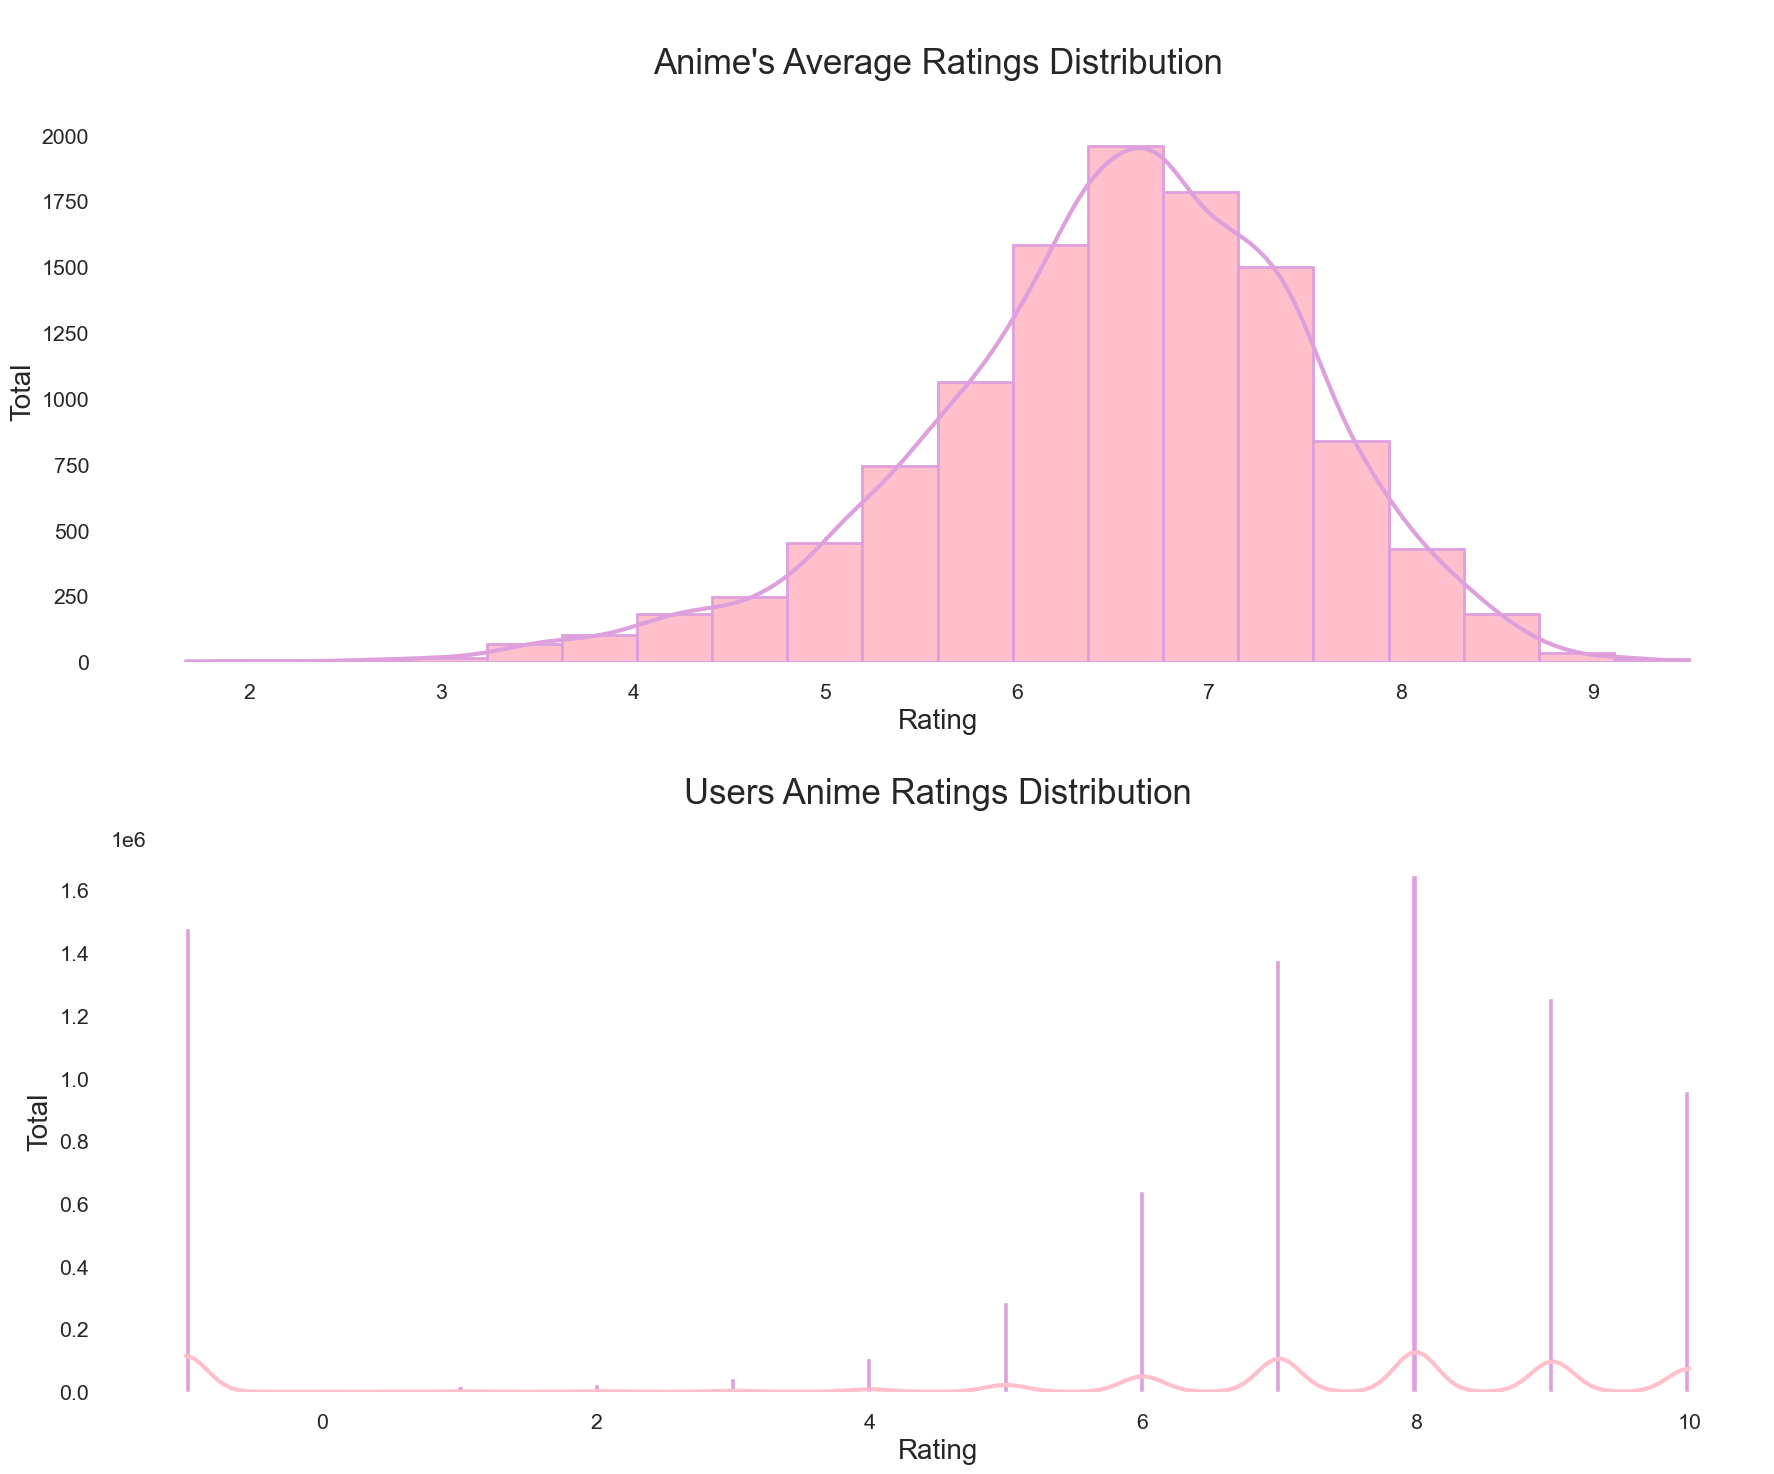

In [20]:
top_anime_temp2 = top_anime.sort_values(["rating"],ascending=False)

_, axs = plt.subplots(2,1,figsize=(20,16),sharex=False,sharey=False)
plt.tight_layout(pad=6.0)

sns.histplot(top_anime_temp2["rating"],color=palette[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nAnime's Average Ratings Distribution\n",fontsize = 25)
axs[0].set_xlabel("Rating\n", fontsize = 20)
axs[0].set_ylabel("Total", fontsize = 20)

sns.histplot(fulldata["user_rating"],color=palette[12],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
axs[1].set_title("\n\n\nUsers Anime Ratings Distribution\n",fontsize = 25)
axs[1].set_xlabel("Rating", fontsize = 20)
axs[1].set_ylabel("Total", fontsize = 20)

sns.despine(left=True, bottom=True)
plt.show()

* Most of the Anime ratings are spreading between 5.5 - 8.0
* Most of the users ratings are spreading between 6.0 - 10.0
* The mode of the users ratings distribution is around 7.0 - 8.0
* Both the distributions -- left skewed
* Users rating(-1 ones) is an outlier in ratings of users which can be discarded

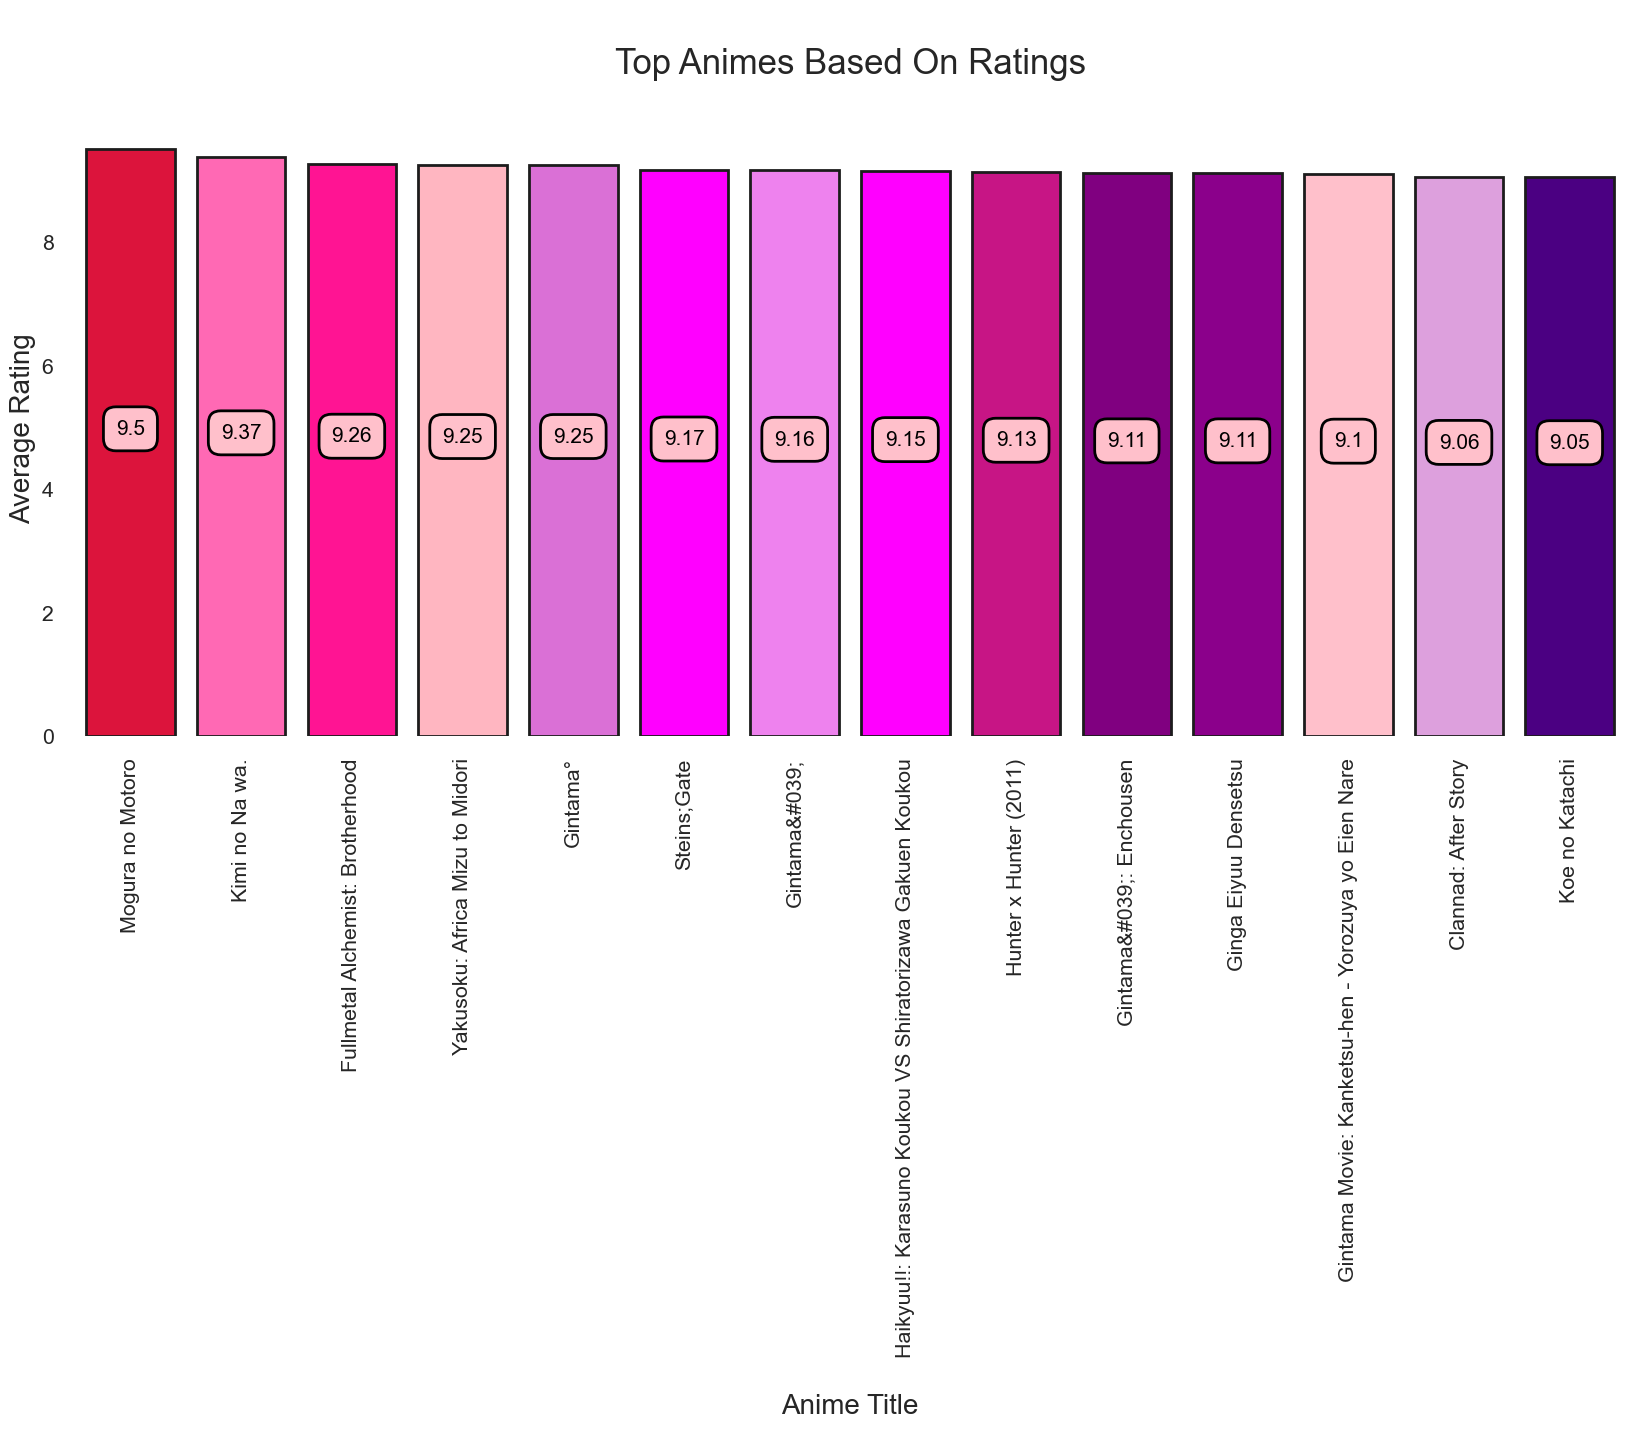

In [21]:
plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_anime_temp2["name"][:14],y=top_anime_temp2["rating"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop Animes Based On Ratings\n",fontsize = 25)
plt.ylabel("Average Rating",fontsize = 20)
plt.xlabel("\nAnime Title",fontsize = 20)
# plt.yscale("log")
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 15,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "pink", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

* **Mogura no Motoro** has the highest rating followed by **Kimi no Na wa.** and **Fullmetal Alchemist: Brotherhood** 

Ratings distribution of TV category :



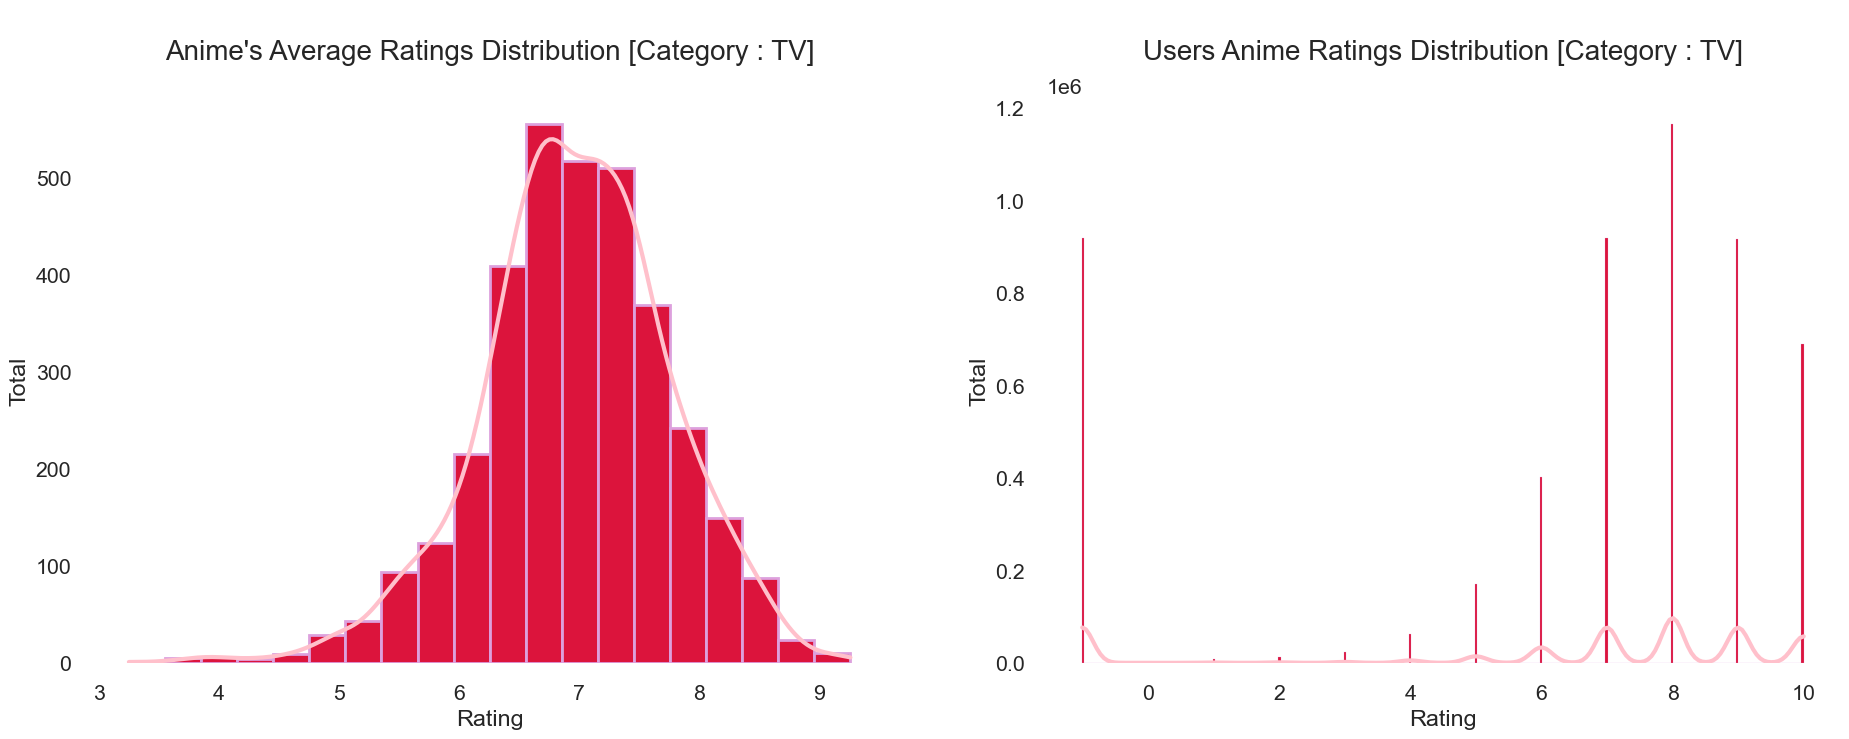

In [24]:
print("Ratings distribution of TV category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="TV"]["rating"],color=palette[0],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : TV]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="TV"]["user_rating"],color=palette[0],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : TV]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()


* Most of the Anime ratings are spreading in 6.0 - 8.0
* Most of the users ratings are spreading in 6.0 - 10.0
* Both the distribution-- left skewed
* Users rating(-1 ones) is an outlier in ratings of users which can be discarded

Ratings distribution of OVA category :



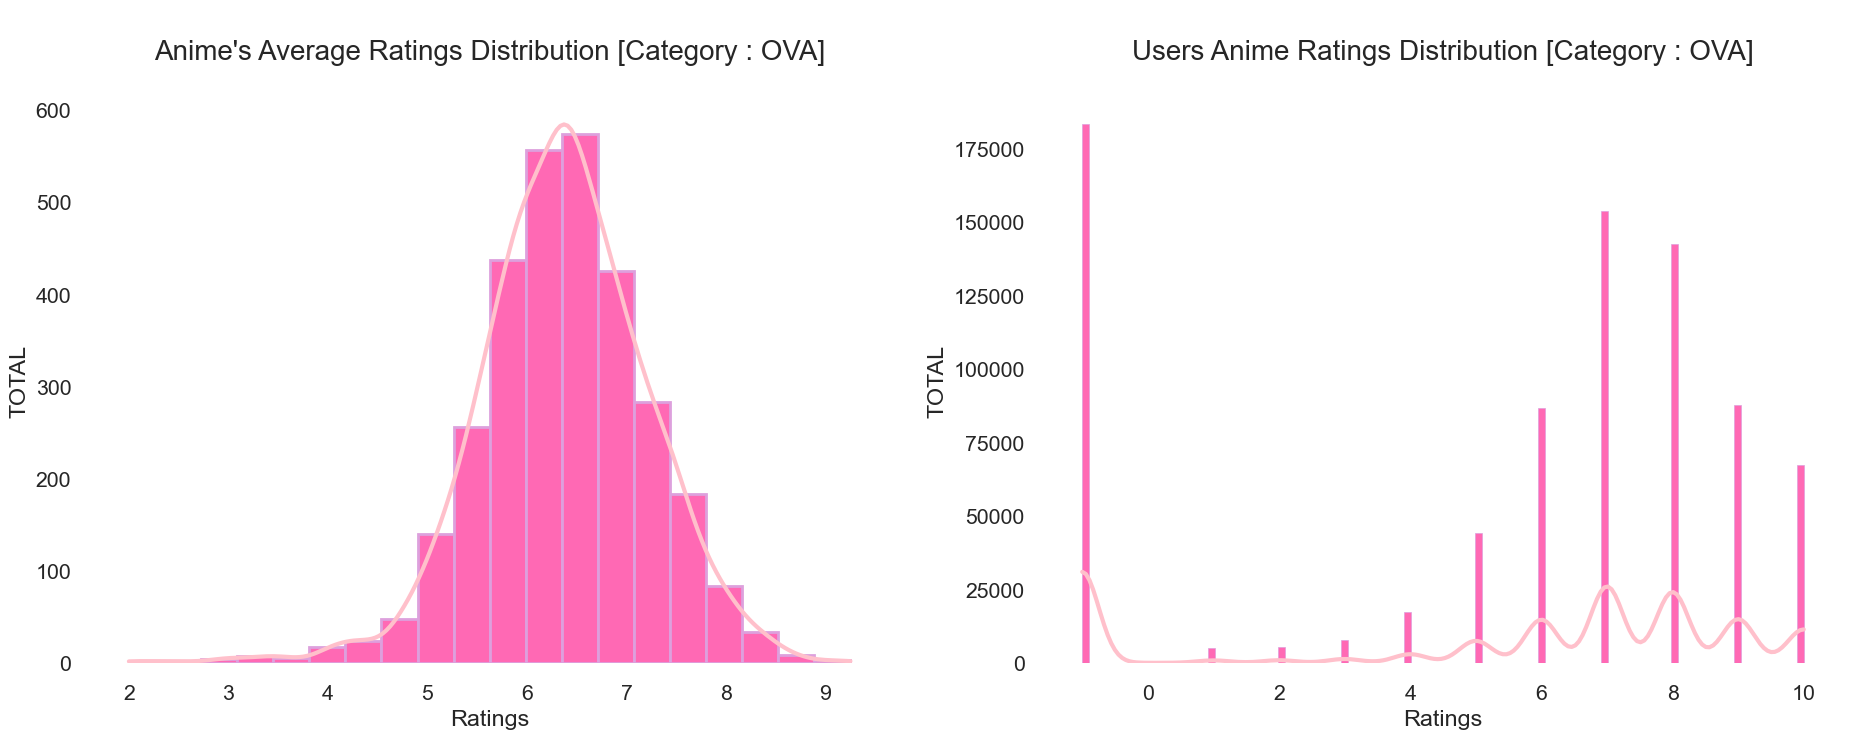

In [25]:
print("Ratings distribution of OVA category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="OVA"]["rating"],color=palette[1],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : OVA]\n",fontsize=20)
axs[0].set_xlabel("Ratings")
axs[0].set_ylabel("TOTAL")

sns.histplot(fulldata[fulldata["type"]=="OVA"]["user_rating"],color=palette[1],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : OVA]\n",fontsize=20)
axs[1].set_xlabel("Ratings")
axs[1].set_ylabel("TOTAL")

sns.despine(left=True, bottom=True)
plt.show()

* Most of the Anime ratings are spreading in 5.5 - 7.5
* Most of the users ratings are spreading in 5.5 - 10.0
* The mode of the users ratings distribution is around 7.0 - 8.0
* Both the distribution---left skewed
* Users rating(-1) is an outlier in ratings of users which can be discarded

Ratings distribution of MOVIE category :



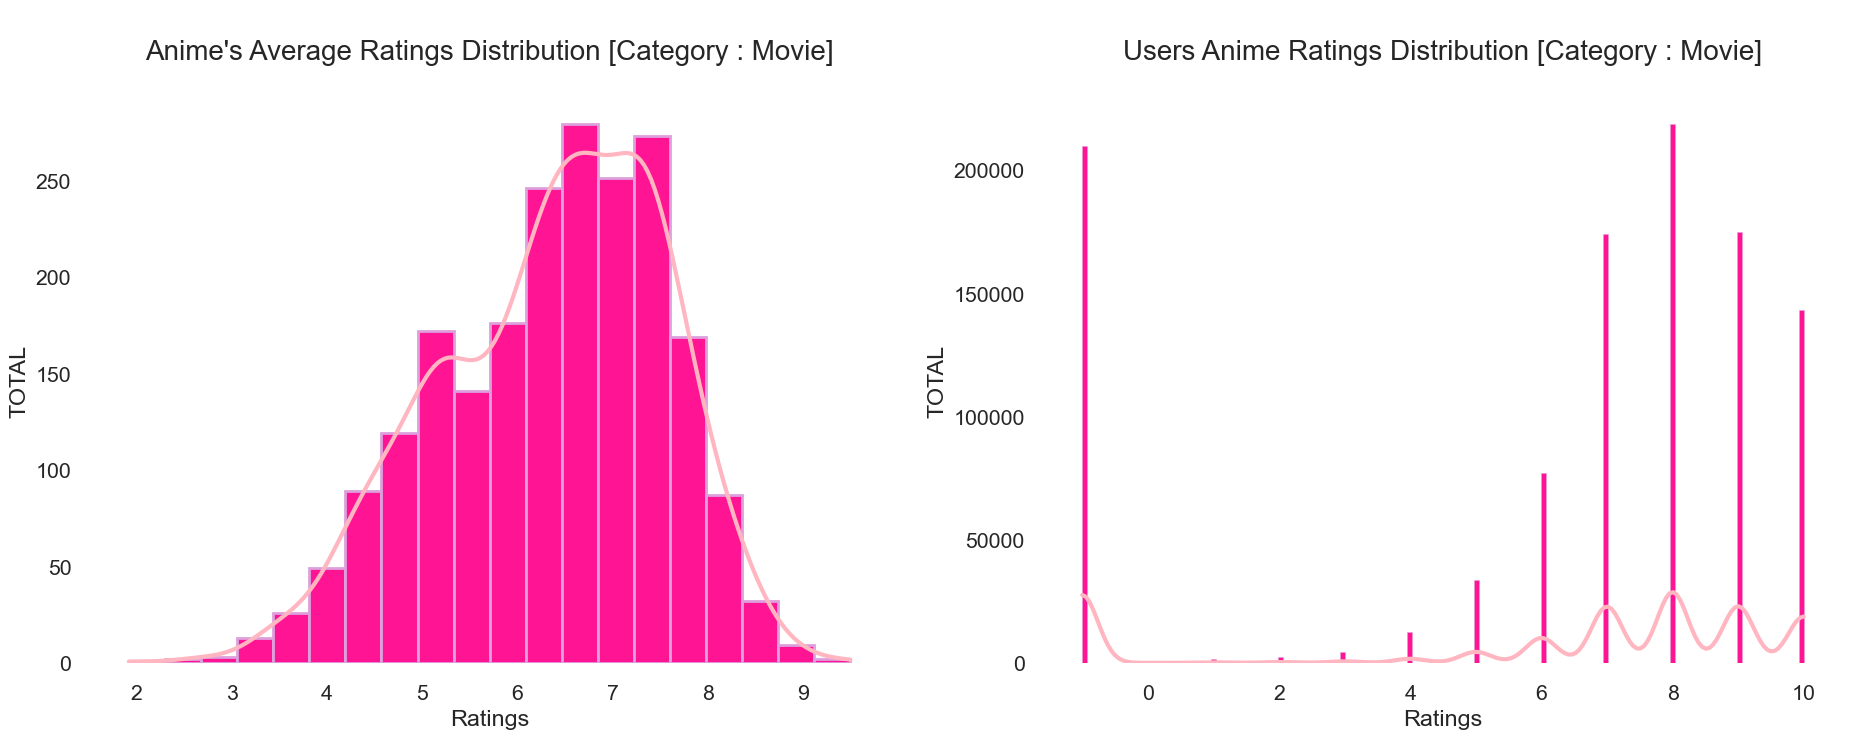

In [26]:
print("Ratings distribution of MOVIE category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="Movie"]["rating"],color=palette[2],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[3])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Movie]\n",fontsize=20)
axs[0].set_xlabel("Ratings")
axs[0].set_ylabel("TOTAL")

sns.histplot(fulldata[fulldata["type"]=="Movie"]["user_rating"],color=palette[2],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[3])
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Movie]\n",fontsize=20)
axs[1].set_xlabel("Ratings")
axs[1].set_ylabel("TOTAL")

sns.despine(left=True, bottom=True)
plt.show()


* Most of the Anime ratings are spreading in 4.5 - 8.5
* Most of the users ratings are spreading in 5.0 - 10.0
* The mode of the users ratings distribution is around 7.0 - 9.0
* Both the distribution---left skewed
* Users rating(-1 ones) is an outlier in ratings of users can be discarded

Ratings distribution of SPECIAL category :



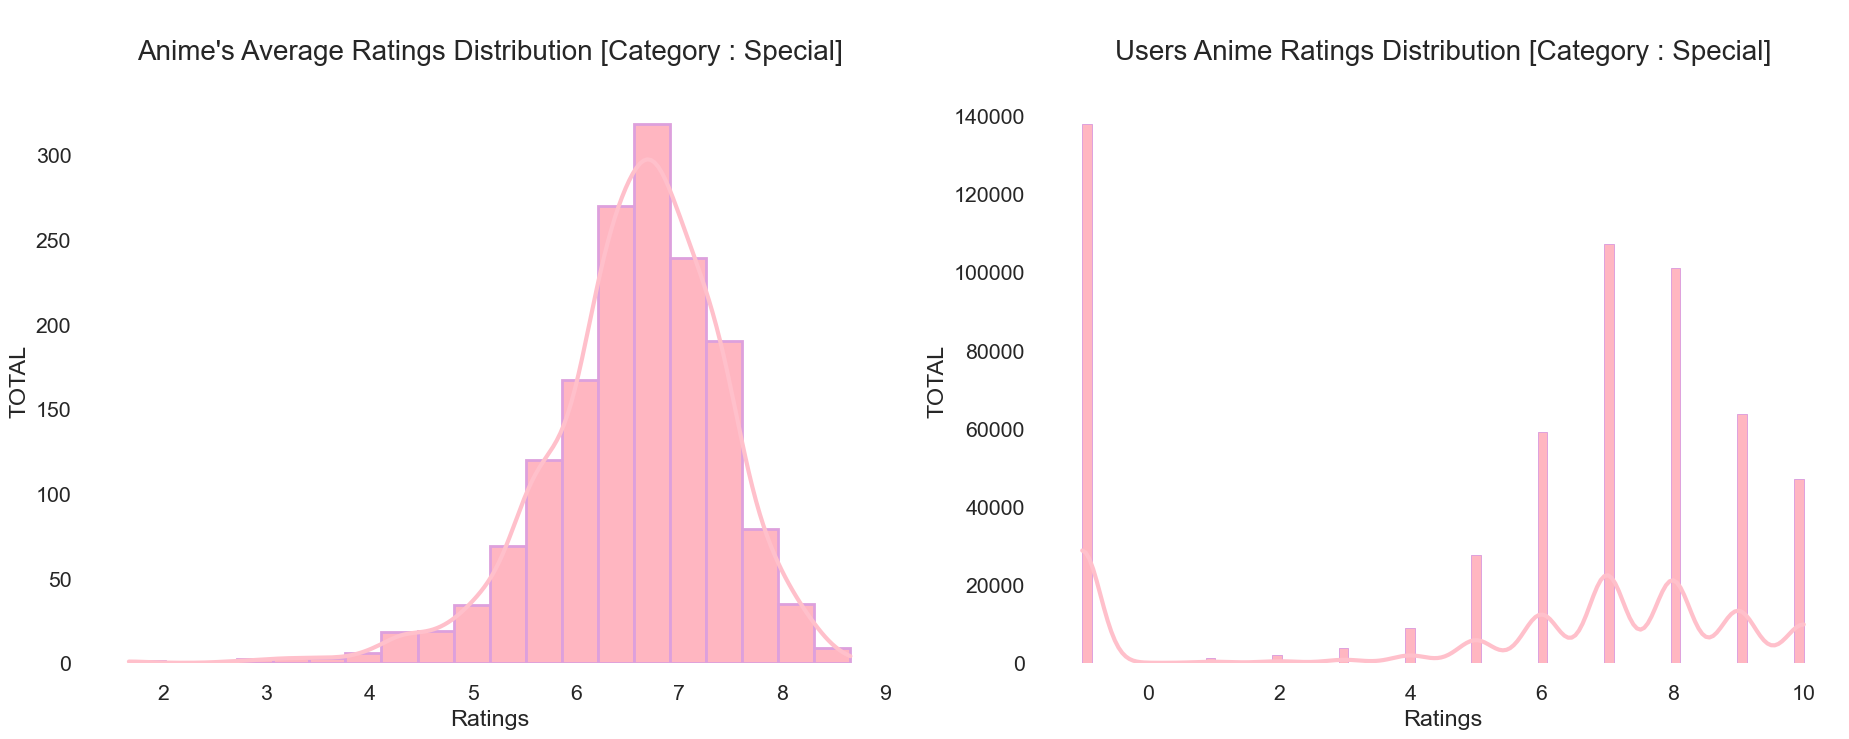

In [27]:
print("Ratings distribution of SPECIAL category :\n")
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="Special"]["rating"],color=palette[3],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Special]\n",fontsize=20)
axs[0].set_xlabel("Ratings")
axs[0].set_ylabel("TOTAL")

sns.histplot(fulldata[fulldata["type"]=="Special"]["user_rating"],color=palette[3],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Special]\n",fontsize=20)
axs[1].set_xlabel("Ratings")
axs[1].set_ylabel("TOTAL")

sns.despine(left=True, bottom=True)
plt.show()

* Most of the Anime ratings are spreading between 5.5 - 8.0
* Most of the users ratings are spreading between 5.0 - 10.0
* The mode of the users ratings distribution is around 7.0 - 8.0
* Both the distribution--left skewed
* Users rating(-1 ones) is an outlier in ratings of users can be discarded

Ratings distribution of ONA category :



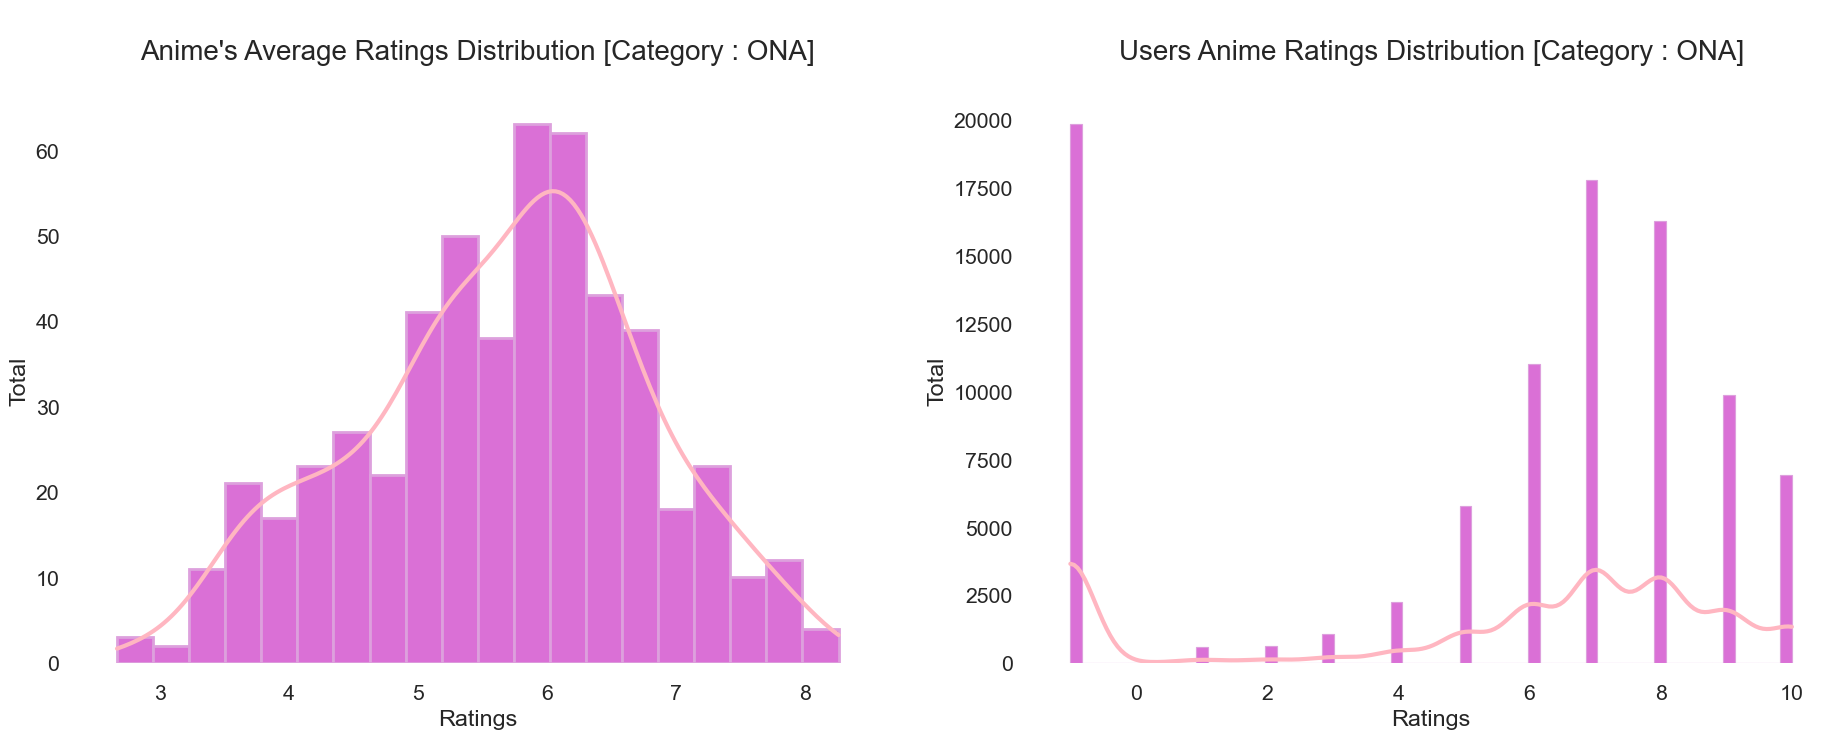

In [29]:
print("Ratings distribution of ONA category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="ONA"]["rating"],color=palette[4],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[3])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : ONA]\n",fontsize=20)
axs[0].set_xlabel("Ratings")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="ONA"]["user_rating"],color=palette[4],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[3])
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : ONA]\n",fontsize=20)
axs[1].set_xlabel("Ratings")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

* Most of the Anime ratings are spread between 4.0 - 7.0
* Most of the users ratings are spread between 5.0 - 10.0
* The mode of the users ratings distribution is around 7.0 - 8.0
* Both the distribution are left skewed
* Users rating(-1) is an outlier in ratings of users which can be discarded

Ratings distribution of MUSIC category :



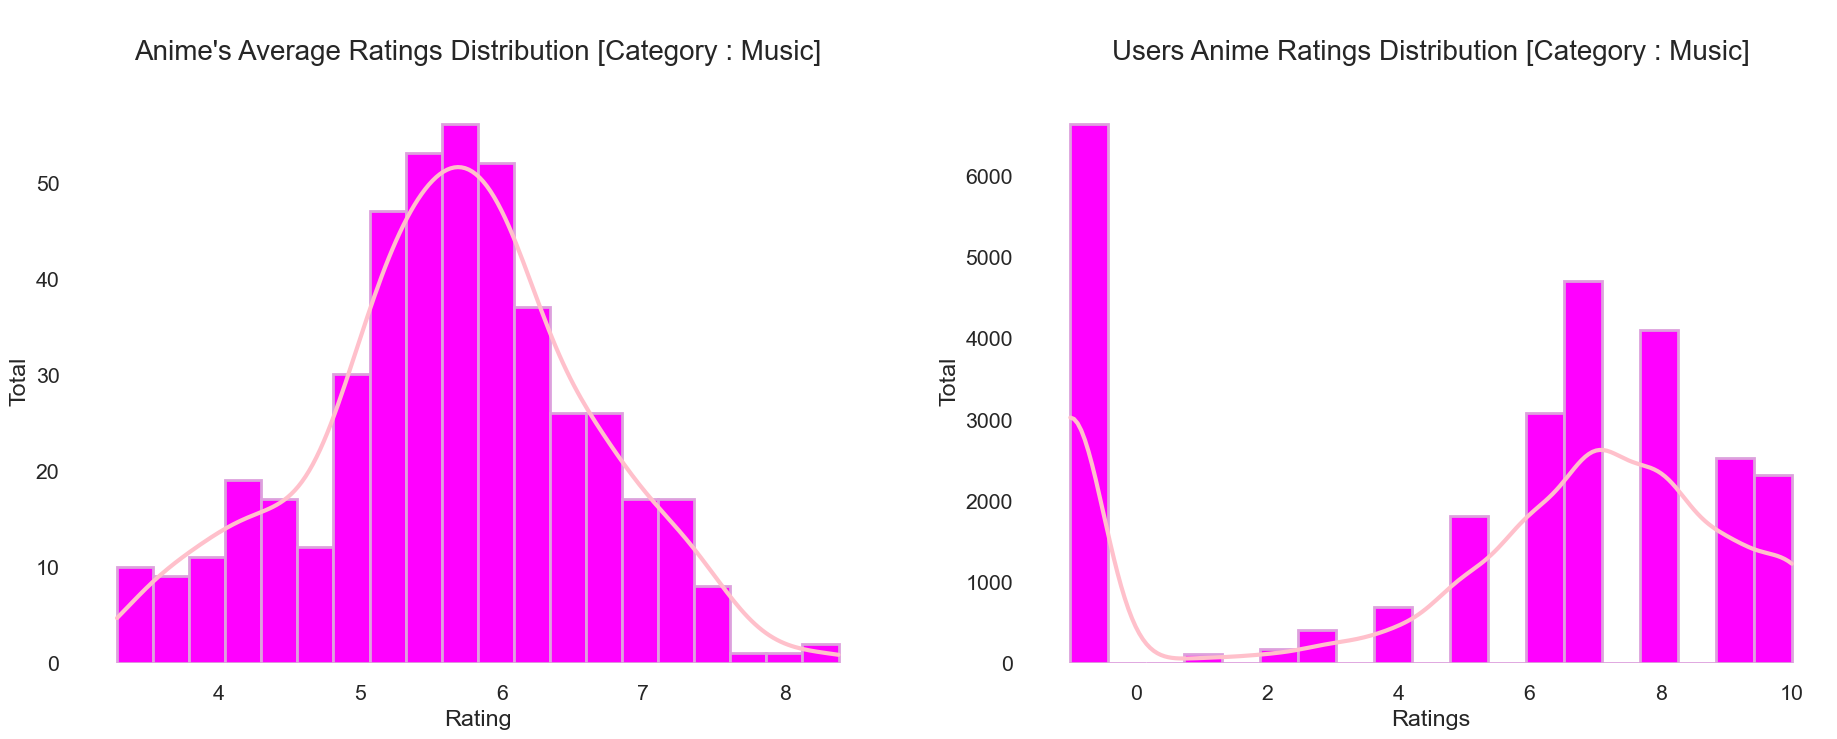

In [31]:
print("Ratings distribution of MUSIC category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="Music"]["rating"],color=palette[5],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Music]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="Music"]["user_rating"],color=palette[5],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Music]\n",fontsize=20)
axs[1].set_xlabel("Ratings")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

* Most of the Anime ratings are spreading between 4.0 - 7.5
* Most of the users ratings are spreading between 5.0 - 10.0
* The mode of the users ratings distribution is around 6.5 - 8.0
* Both the distribution are left skewed
* Users rating(-1ones) is an outlier in ratings of users which can be discarded

In [33]:
top_anime_temp3 = top_anime[["genre"]]
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.split(", | , | ,")
top_anime_temp3 = top_anime_temp3.explode("genre")
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.title()

print(f'Total unique genres are {len(top_anime_temp3["genre"].unique())}')
print(f'Occurances of unique genres :')
top_anime_temp3["genre"].value_counts().to_frame().T.style.set_properties(**{"background-color": "pink","color":"purple","border": "1.5px  solid black"})

Total unique genres are 44
Occurances of unique genres :


,Comedy,Action,Adventure,Fantasy,Sci-Fi,Drama,Shounen,Romance,Kids,School,Slice Of Life,Hentai,Supernatural,Mecha,Music,Historical,Magic,Ecchi,Shoujo,Seinen,Sports,Mystery,Super Power,Military,Parody,Space,Horror,Harem,Demons,Martial Arts,Psychological,Dementia,Police,Game,Samurai,Vampire,Thriller,Cars,Shounen Ai,Shoujo Ai,Josei,Yuri,Yaoi
genre,4272,2687,2198,2108,1983,1857,1636,1420,1306,1135,1115,1095,965,910,763,719,712,620,576,513,508,472,433,410,379,362,348,306,279,246,221,200,183,162,142,97,85,65,61,54,52,41,37


In [36]:
data = fulldata.copy()
data["user_rating"].replace(to_replace = -1 , value = np.nan ,inplace=True)
data = data.dropna(axis = 0)
print("Null values after final preprocessing :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "pink","color":"purple","border": "1.5px  solid black"})

Null values after final preprocessing :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,0,0,0,0,0,0,0,0,0


There are a lot of users who have rated only once, even if they have rated at least 5 animes, it cannot be considered as a valuable record for recommendation. So we will consider minimum 50 ratings by the user as a value.

In [37]:
selected_users = data["user_id"].value_counts()
data = data[data["user_id"].isin(selected_users[selected_users >= 50].index)]

We will create a pivot table consists of rows as title and columns as user id, this situation help us to create sparse matrix which can be helpful in find the cosine similarity.

In [38]:
data_pivot_temp = data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
data_pivot_temp.head()

user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Eiji&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We have got many japanese or special character symbols in anime name,remove those using this function

In [39]:
import re
def cleanerbambam(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

data["name"] = data["name"].apply(cleanerbambam)

In [41]:
data_pivot = data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
print("After Cleaning the animes names how it looks like.")
data_pivot.head()

After Cleaning the animes names how it looks like.


user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009 Re:Cyborg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1: RandB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**THIS PART IS FROM DOCUMENTATION!!!!**
Content based filtering recommends items based on a comparison between the content of the items and a user profile. The content of each item is represented as a set of descriptors or terms, typically the words that occur in a document. A content based recommender works with data that the user provides, either explicitly (rating) or implicitly (clicking on a link). Based on that data, a user profile is generated which is then used to make suggestions for the user. As the user provides more inputs or takes actions on the recommendations, the engine becomes more and more accurate.

**Term Frequency(TF) & Inverse Document Frequency(IDF)**

TF is simply the frequency of a word in a document. IDF is the inverse of the document frequency among the whole corpus of documents. TF-IDF is used mainly because of two reasons: Suppose we search for “the rise of analytics” on Google. It is certain that “the” will occur more frequently than “analytics” but the relative importance of analytics is higher than the search query point of view. In such cases, TF-IDF weighting negates the effect of high frequency words in determining the importance of an item (document).
Here we are going to use it on the genre of animes so that we can recommend contents to the users based on genres.

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words = "english")

rec_data = fulldata.copy()
rec_data.drop_duplicates(subset ="name", keep = "first", inplace = True)
rec_data.reset_index(drop = True, inplace = True)
genres = rec_data["genre"].str.split(", | , | ,").astype(str)
tfv_matrix = tfv.fit_transform(genres)

Scikit-learn already provides pairwise metrics (a.k.a. kernels in machine learning parlance) that work for both dense and sparse representations of vector collections. Here we need to assign 1 for recommended anime and 0 for not recommended anime. We will use sigmoid kernel here.

In [43]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)      # Computing sigmoid kernel

rec_indices = pd.Series(rec_data.index, index = rec_data["name"]).drop_duplicates()


# Recommendation Function
def give_recommendation(title, sig = sig):
    
    idx = rec_indices[title] # Getting index corresponding to original_title

    sig_score = list(enumerate(sig[idx]))  # Getting pairwsie similarity scores 
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
    sig_score = sig_score[1:11]
    anime_indices = [i[0] for i in sig_score]
     
    # Top 10 similar movies
    rec_dic = {"No" : range(1,11), 
               "Anime Name" : anime["name"].iloc[anime_indices].values,
               "Rating" : anime["rating"].iloc[anime_indices].values}
    dataframe = pd.DataFrame(data = rec_dic)
    dataframe.set_index("No", inplace = True)
    
    print(f"Recommendations for {title} viewers :\n")
    
    return dataframe.style.set_properties(**{"background-color": "pink","color":"white","border": "1.5px  solid black"})

In [44]:
give_recommendation("Naruto")

Recommendations for Naruto viewers :



,Anime Name,Rating
No,,
1,To LOVE-Ru Darkness OVA,7.820000
2,Hanbun no Tsuki ga Noboru Sora,7.690000
3,Mai-HiME,7.590000
4,Doraemon Movie 28: Nobita to Midori no Kyojin Den,7.540000
5,Rurouni Kenshin Special,7.510000
6,Pikmin Short Movies,7.270000
7,Deadman Wonderland OVA,7.120000
8,Marimo no Hana: Saikyou Butouha Shougakusei Densetsu,5.120000
9,Shinpi no Hou,5.370000


In [45]:
give_recommendation("Death Note")

Recommendations for Death Note viewers :



,Anime Name,Rating
No,,
1,Hachimitsu to Clover Specials,7.850000
2,Trapp Ikka Monogatari,7.750000
3,Major S1,8.420000
4,Hakkenden: Touhou Hakken Ibun,7.570000
5,Nazotokine,4.860000
6,ef: A Tale of Melodies.,8.180000
7,Saki Achiga-hen: Episode of Side-A Specials,7.630000
8,One Piece: Oounabara ni Hirake! Dekkai Dekkai Chichi no Yume!,7.430000
9,Kizumonogatari II: Nekketsu-hen,8.730000


In [46]:
give_recommendation("Bleach")

Recommendations for Bleach viewers :



,Anime Name,Rating
No,,
1,Detective Conan Movie 19: The Hellfire Sunflowers,7.770000
2,Persona 4 the Animation,7.680000
3,Shelter,8.380000
4,Hotori: Tada Saiwai wo Koinegau,7.140000
5,Bakusou Kyoudai Let's & Go,6.860000
6,One Piece: Cry Heart,6.850000
7,Taimadou Gakuen 35 Shiken Shoutai,7.050000
8,Shikabane Hime: Kuro Special,7.120000
9,Cheung gong chat hou,6.650000


**DOCUMENTATION PART** 
Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. We will use Cosine similarity which is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity.

In [48]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

data_matrix = csr_matrix(data_pivot.values)

model_knn = NearestNeighbors(metric = "cosine", algorithm = "brute")
model_knn.fit(data_matrix)

query_no = np.random.choice(data_pivot.shape[0]) # random anime title and find rec
print(f"find recommendations for {query_no} no anime which is {data_pivot.index[query_no]}.")
distances, indices = model_knn.kneighbors(data_pivot.iloc[query_no,:].values.reshape(1, -1), n_neighbors = 6)

find recommendations for 5614 no anime which is Minna Atsumare! Falcom Gakuen.


In [49]:
no = []
name = []
distance = []
rating = []

for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f"Recommendations for {data_pivot.index[query_no]} viewers :\n")
    else:   
        no.append(i)
        name.append(data_pivot.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])
        rating.append(*anime[anime["name"]==data_pivot.index[indices.flatten()[i]]]["rating"].values)

dic = {"No" : no, "Anime Name" : name, "Rating" : rating}
recommendation = pd.DataFrame(data = dic)
recommendation.set_index("No", inplace = True)
recommendation.style.set_properties(**{"background-color": "pink","color":"white","border": "1.5px  solid black"})

Recommendations for Minna Atsumare! Falcom Gakuen viewers :



,Anime Name,Rating
No,,
1,Minna Atsumare! Falcom Gakuen SC,6.090000
2,Minna Atsumare! Falcom Gakuen SC Special,5.570000
3,Soul Link Picture Drama,5.840000
4,Shin Strange+,6.390000
5,Strange+ Special,6.040000
